# Data Mining Assignment 3

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
loan_dataset=pd.read_csv("Data for Cleaning & Modeling.csv")

In [6]:
loan_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [7]:
headerName=['interest',
                    'loan_id',
                    'loanee_id',
                    'loan_requested',
                    'loan_funded',
                    'investor_funded_loan',
                    'Number_of_payments',
                    'loan_grade',
                    'loan_subgrade',
                    'employer',
                    'number_of_years_working',
                    'home_owner_ship_status',
                    'annual_income',
                    'income_verified',
                    'loan_issued_date',
                    'loan_reason',
                    'loan_category',
                    'loan_title',
                    'zip_code',
                    'borrower_state',
                    'ratio_totaldebt_requestedloan',
                    'past_due_payments_2yr_30d',
                    'earliest_credit_report',
                    'creditor_inquires_6m',
                    'months_since_delinquency',
                    'months_since_public_record',
                    'borrower_open_creditline',
                    'number_of_dergatory_records',
                    'tot_credit_revolving_balance',
                    'rev_line_utilization_rate',
                    'tot_borrower_credit_lines',
                    'loan_initial_listing_status']

In [8]:
loan_dataset.columns=headerName

In [9]:
loan_dataset.head()

,interest,loan_id,loanee_id,loan_requested,loan_funded,investor_funded_loan,Number_of_payments,loan_grade,loan_subgrade,employer,...,earliest_credit_report,creditor_inquires_6m,months_since_delinquency,months_since_public_record,borrower_open_creditline,number_of_dergatory_records,tot_credit_revolving_balance,rev_line_utilization_rate,tot_borrower_credit_lines,loan_initial_listing_status
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [10]:
loan_dataset.dtypes

interest                          object
loan_id                          float64
loanee_id                        float64
loan_requested                    object
loan_funded                       object
investor_funded_loan              object
Number_of_payments                object
loan_grade                        object
loan_subgrade                     object
employer                          object
number_of_years_working           object
home_owner_ship_status            object
annual_income                    float64
income_verified                   object
loan_issued_date                  object
loan_reason                       object
loan_category                     object
loan_title                        object
zip_code                          object
borrower_state                    object
ratio_totaldebt_requestedloan    float64
past_due_payments_2yr_30d        float64
earliest_credit_report            object
creditor_inquires_6m             float64
months_since_del

## Step1: Missing value imputation

In [11]:
#count of NA values across columns of the dataframe
loan_dataset.isna().sum()

interest                          61010
loan_id                               1
loanee_id                             1
loan_requested                        1
loan_funded                           1
investor_funded_loan                  1
Number_of_payments                    1
loan_grade                        61270
loan_subgrade                     61270
employer                          23986
number_of_years_working           17538
home_owner_ship_status            61361
annual_income                     61028
income_verified                       1
loan_issued_date                      1
loan_reason                      276440
loan_category                         1
loan_title                           19
zip_code                              1
borrower_state                        1
ratio_totaldebt_requestedloan         1
past_due_payments_2yr_30d             1
earliest_credit_report                1
creditor_inquires_6m                  1
months_since_delinquency         218802


In [12]:
#replicating the dataframe
loan_data=loan_dataset

Interest feature is the target variable. When dealing with the missing value imputation with respect to the target variable, it's better to drop the rows concering the missing values.

In [13]:
loan_data = loan_data[loan_data['interest'].notna()]
loan_data = loan_data[loan_data['loanee_id'].notna()]
loan_data.isna().sum()

interest                              0
loan_id                               0
loanee_id                             0
loan_requested                        0
loan_funded                           0
investor_funded_loan                  0
Number_of_payments                    0
loan_grade                        51866
loan_subgrade                     51866
employer                          20256
number_of_years_working           14794
home_owner_ship_status            51959
annual_income                     51751
income_verified                       0
loan_issued_date                      0
loan_reason                      233933
loan_category                         0
loan_title                           16
zip_code                              0
borrower_state                        0
ratio_totaldebt_requestedloan         0
past_due_payments_2yr_30d             0
earliest_credit_report                0
creditor_inquires_6m                  0
months_since_delinquency         185456


In [14]:
#Cleaning the data before converting the datatypes
loan_data['loan_requested'] = loan_data['loan_requested'].str.replace(',','')
loan_data['loan_funded'] = loan_data['loan_funded'].str.replace(',','')
loan_data['investor_funded_loan'] = loan_data['investor_funded_loan'].str.replace(',','')
loan_data['loan_requested'] = loan_data['loan_requested'].str.replace(',','')
loan_data['loan_funded'] = loan_data['loan_funded'].str.replace(',','')
loan_data['investor_funded_loan'] = loan_data['investor_funded_loan'].str.replace(',','')
loan_data['loan_requested'] = loan_data['loan_requested'].str.replace('$','')
loan_data['loan_funded'] = loan_data['loan_funded'].str.replace('$','')
loan_data['investor_funded_loan'] = loan_data['investor_funded_loan'].str.replace('$','')
loan_data['loan_requested'] = loan_data['loan_requested'].str.replace('$','')
loan_data['loan_funded'] = loan_data['loan_funded'].str.replace('$','')
loan_data['investor_funded_loan'] = loan_data['investor_funded_loan'].str.replace('$','')
loan_data['number_of_years_working'] = loan_data['number_of_years_working'].str.replace('years','')
loan_data['number_of_years_working'] = loan_data['number_of_years_working'].str.replace('year','')
loan_data['number_of_years_working'] = loan_data['number_of_years_working'].str.replace('+','')
loan_data['number_of_years_working'] = loan_data['number_of_years_working'].str.replace('<','')
loan_data['number_of_years_working'] = loan_data['number_of_years_working'].str.strip()
loan_data['number_of_years_working']=loan_data['number_of_years_working'].astype('float')


loan_data.head()

,interest,loan_id,loanee_id,loan_requested,loan_funded,investor_funded_loan,Number_of_payments,loan_grade,loan_subgrade,employer,...,earliest_credit_report,creditor_inquires_6m,months_since_delinquency,months_since_public_record,borrower_open_creditline,number_of_dergatory_records,tot_credit_revolving_balance,rev_line_utilization_rate,tot_borrower_credit_lines,loan_initial_listing_status
0,11.89%,54734.0,80364.0,25000,25000,19080,36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,7000,7000,673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,25000,25000,24725,36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,1200,1200,1200,36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,10800,10800,10692,36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [15]:
loan_data['interest']=loan_data['interest'].str.rstrip('%').astype('float')/100
loan_data['loan_requested']=loan_data['loan_requested'].astype('float')
loan_data['loan_funded']=loan_data['loan_funded'].astype('float')
loan_data['investor_funded_loan']=loan_data['investor_funded_loan'].astype('float')
loan_data['rev_line_utilization_rate']=loan_data['rev_line_utilization_rate'].str.rstrip('%').astype('float')/100
loan_data['loan_id']=loan_data['loan_id'].astype('int')
loan_data['loanee_id']=loan_data['loanee_id'].astype('int')


###### Imputing missing values for months_since_delinquency and months_since_public_record columns

In [16]:
#Analysis of missing values across each column

#considering that delinqyency and public records may lessen the chances of loan approval. We can fill in the missing values with 0
loan_data['months_since_delinquency'] = np.where(loan_data['months_since_delinquency'].isnull(), 0, loan_data['months_since_delinquency'])
loan_data['months_since_public_record'] = np.where(loan_data['months_since_public_record'].isnull(), 0, loan_data['months_since_public_record'])

print(loan_data.isnull().sum())


interest                              0
loan_id                               0
loanee_id                             0
loan_requested                        0
loan_funded                           0
investor_funded_loan                  0
Number_of_payments                    0
loan_grade                        51866
loan_subgrade                     51866
employer                          20256
number_of_years_working           14794
home_owner_ship_status            51959
annual_income                     51751
income_verified                       0
loan_issued_date                      0
loan_reason                      233933
loan_category                         0
loan_title                           16
zip_code                              0
borrower_state                        0
ratio_totaldebt_requestedloan         0
past_due_payments_2yr_30d             0
earliest_credit_report                0
creditor_inquires_6m                  0
months_since_delinquency              0


###### Imputing missing values for number_of_years_working column

Assuming that annual_income can be imputed from number_of_years_working and to do that we need to fill the missing values of the number_of_years_working field.  
To do that we have to find the distribution of the mentioned field. If the data has outliers we can replace the missing values with median and mean if there are no outliers


In [17]:
##Assuming that annual_income can be imputed from number_of_years_working and to do that we need to fill the missing values of the number_of_years_working field.
##To do that we have to find the distribution of the mentioned field. If the data has outliers we can replace the missing values with median and mean if there are no outliers

loan_datav2 = loan_data[loan_data['number_of_years_working'].notna()]
mean_value=loan_datav2['number_of_years_working'].mean()
median_value=loan_datav2['number_of_years_working'].median()

print(mean_value, median_value)

6.071774703496352 6.0


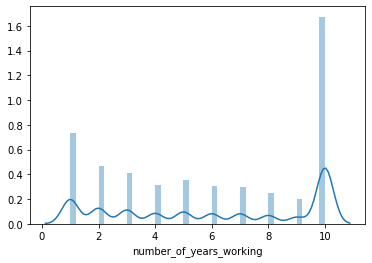

In [18]:
#total_annual_income can be averaged out on the basis of the homeowner ship status and number of years working
#However to do that first we have to check if the data with annual income missing have the homeownership and work data present or not.

#removing the data points where the data for loan_funded field isn't present
#loan_datav3=loan_datav2.count()['number_of_years_working']

sns.distplot(loan_datav2[loan_datav2['number_of_years_working'].notnull()]['number_of_years_working'])



In [19]:
loan_datav2['number_of_years_working'].describe()

count    324195.000000
mean          6.071775
std           3.488977
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: number_of_years_working, dtype: float64

interest                              0
loan_id                               0
loanee_id                             0
loan_requested                        0
loan_funded                           0
investor_funded_loan                  0
Number_of_payments                    0
loan_grade                        51866
loan_subgrade                     51866
employer                          20256
number_of_years_working               0
home_owner_ship_status            51959
annual_income                     51751
income_verified                       0
loan_issued_date                      0
loan_reason                      233933
loan_category                         0
loan_title                           16
zip_code                              0
borrower_state                        0
ratio_totaldebt_requestedloan         0
past_due_payments_2yr_30d             0
earliest_credit_report                0
creditor_inquires_6m                  0
months_since_delinquency              0


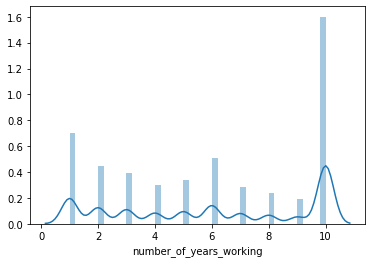

In [20]:
loan_data['number_of_years_working'] = np.where(loan_data['number_of_years_working'].isnull(), 6, loan_data['number_of_years_working'])

sns.distplot(loan_data[loan_data['number_of_years_working'].notnull()]['number_of_years_working'])

print(loan_data.isnull().sum())

###### Imputing missing values for annual income column

Assuming that the annual income is based on the number of years working. The missing values in the annual income feature are imputed based on the average of the number of years working

In [21]:
loan_data['annual_income'] = loan_data.groupby(['number_of_years_working']).annual_income.apply(lambda x: x.fillna(x.mean()))
loan_data['annual_income'].mean()
print(loan_data.isnull().sum())

interest                              0
loan_id                               0
loanee_id                             0
loan_requested                        0
loan_funded                           0
investor_funded_loan                  0
Number_of_payments                    0
loan_grade                        51866
loan_subgrade                     51866
employer                          20256
number_of_years_working               0
home_owner_ship_status            51959
annual_income                         0
income_verified                       0
loan_issued_date                      0
loan_reason                      233933
loan_category                         0
loan_title                           16
zip_code                              0
borrower_state                        0
ratio_totaldebt_requestedloan         0
past_due_payments_2yr_30d             0
earliest_credit_report                0
creditor_inquires_6m                  0
months_since_delinquency              0


###### Based on the number_of_years_working and annual_income we can try to estimate the homeownership status

In [22]:
loan_data.groupby(['home_owner_ship_status']).agg({'number_of_years_working':['mean','median','min','max'],'annual_income':['mean','median','min','max']})


number_of_years_working                    \
                                          mean median  min   max   
home_owner_ship_status                                             
ANY                                   5.000000    5.0  5.0   5.0   
MORTGAGE                              6.729107    7.0  1.0  10.0   
NONE                                  6.433333    6.5  1.0  10.0   
OTHER                                 4.700935    4.0  1.0  10.0   
OWN                                   6.231502    6.0  1.0  10.0   
RENT                                  5.195303    5.0  1.0  10.0   

                       annual_income                                
                                mean   median       min        max  
home_owner_ship_status                                              
ANY                     35680.000000  35680.0  35680.00    35680.0  
MORTGAGE                81848.227404  73000.0   7904.04  7500000.0  
NONE                    65252.591766  57500.0  22200.00   150000.0  
OTHER                   68076.296816  68000.0  11389.00   240000.0  
OWN                     66442.743697  60000.0   4000.00  1200000.0  
RENT                    63759.934904  60000.0   4000.00  7446395.0

In [23]:
loan_data.groupby(['home_owner_ship_status']).count()['loanee_id']
#Combining Any, None and Other in Other

loan_data['home_owner_ship_status'] = loan_data['home_owner_ship_status'].replace(['ANY', 'NONE'], 'OTHER')

loan_data.groupby(['home_owner_ship_status']).count()['loanee_id']


home_owner_ship_status
MORTGAGE    145958
OTHER          138
OWN          24976
RENT        115958
Name: loanee_id, dtype: int64

In [24]:
loan_data.groupby(['home_owner_ship_status']).agg({'number_of_years_working':['mean','median','min','max'],'annual_income':['mean','median','min','max']})


number_of_years_working                    \
                                          mean median  min   max   
home_owner_ship_status                                             
MORTGAGE                              6.729107    7.0  1.0  10.0   
OTHER                                 5.079710    5.0  1.0  10.0   
OWN                                   6.231502    6.0  1.0  10.0   
RENT                                  5.195303    5.0  1.0  10.0   

                       annual_income                                
                                mean   median       min        max  
home_owner_ship_status                                              
MORTGAGE                81848.227404  73000.0   7904.04  7500000.0  
OTHER                   67227.692118  64100.0  11389.00   240000.0  
OWN                     66442.743697  60000.0   4000.00  1200000.0  
RENT                    63759.934904  60000.0   4000.00  7446395.0

Based on the above table we can see the income and number of years working data is not consistent with the home_ownership_status. So replacing the NaN values with Other

In [25]:
loan_data['home_owner_ship_status'] = np.where(loan_data['home_owner_ship_status'].isnull(), 'OTHER', loan_data['home_owner_ship_status'])
loan_data.groupby(['home_owner_ship_status']).count()['loanee_id']


home_owner_ship_status
MORTGAGE    145958
OTHER        52097
OWN          24976
RENT        115958
Name: loanee_id, dtype: int64

##### Imputing loan_grade and loan_subgrade on number_of_years_working, annual_income and homeowner_shipstatus

In [26]:
loan_data.groupby(['loan_grade','home_owner_ship_status']).agg({'number_of_years_working':['mean','median'],'annual_income':['mean','median']})

#loan_data.groupby(['loan_grade']).count()['loanee_id']


number_of_years_working         \
                                                     mean median   
loan_grade home_owner_ship_status                                  
A          MORTGAGE                              6.534238    7.0   
           OTHER                                 5.863132    6.0   
           OWN                                   6.360502    6.0   
           RENT                                  4.624085    4.0   
B          MORTGAGE                              6.692552    7.0   
           OTHER                                 6.009068    6.0   
           OWN                                   6.169154    6.0   
           RENT                                  5.130727    5.0   
C          MORTGAGE                              6.805191    8.0   
           OTHER                                 6.176431    6.0   
           OWN                                   6.239860    6.0   
           RENT                                  5.291441    5.0   
D          MORTGAGE                              6.835709    8.0   
           OTHER                                 6.096556    6.0   
           OWN                                   6.213078    6.0   
           RENT                                  5.359769    5.0   
E          MORTGAGE                              6.794312    7.0   
           OTHER                                 6.162186    6.0   
           OWN                                   6.251225    6.0   
           RENT                                  5.516500    5.0   
F          MORTGAGE                              6.927867    8.0   
           OTHER                                 6.354373    7.0   
           OWN                                   6.382812    6.0   
           RENT                                  5.616708    6.0   
G          MORTGAGE                              6.816038    8.0   
           OTHER                                 6.637224    7.0   
           OWN                                   6.853659    7.0   
           RENT                                  5.517986    5.0   

                                  annual_income                
                                           mean        median  
loan_grade home_owner_ship_status                              
A          MORTGAGE                88130.477611  78000.000000  
           OTHER                   79847.232981  71798.615828  
           OWN                     72953.781410  65000.000000  
           RENT                    68820.674865  65000.000000  
B          MORTGAGE                80349.466996  71960.146998  
           OTHER                   71106.118107  67000.000000  
           OWN                     64989.193464  60000.000000  
           RENT                    62647.264403  60000.000000  
C          MORTGAGE                79300.784478  71960.146998  
           OTHER                   70730.614634  65000.000000  
           OWN                     64381.742520  60000.000000  
           RENT                    62001.535206  58000.000000  
D          MORTGAGE                79793.723778  71960.146998  
           OTHER                   71076.738636  65000.000000  
           OWN                     65302.079590  60000.000000  
           RENT                    61951.597841  58644.000000  
E          MORTGAGE                83788.091804  73800.000000  
           OTHER                   74330.663313  68674.325204  
           OWN                     67373.370473  60000.000000  
           RENT                    66139.496543  62174.428778  
F          MORTGAGE                84776.038565  75000.000000  
           OTHER                   78501.634945  71036.697788  
           OWN                     67591.171041  64350.500000  
           RENT                    67770.599625  65000.000000  
G          MORTGAGE                94643.323182  80019.734884  
           OTHER                   89850.938855  73312.389131  
           OWN                     77418.847636  66232.000000  
     

In [27]:
### based on the above table the missing values of the loan grade column are filled accordingly

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=7) 
                                   & (loan_data['annual_income']>= 88078) 
                                    &(loan_data['home_owner_ship_status']=='MORTGAGE')), 'A', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=7) 
                                   & (loan_data['annual_income']>79883) & (loan_data['annual_income']<88078)
                                    &(loan_data['home_owner_ship_status']=='MORTGAGE')), 'B', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=8) 
                                   & (loan_data['annual_income']<=80248) 
                                    &(loan_data['home_owner_ship_status']=='MORTGAGE')), 'C', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=7) 
                                   & (loan_data['annual_income']<=79883) 
                                    &(loan_data['home_owner_ship_status']=='MORTGAGE')), 'D', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']>=8) 
                                   & (loan_data['annual_income']> 80248) & (loan_data['annual_income']<84419) 
                                    &(loan_data['home_owner_ship_status']=='MORTGAGE')), 'E', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']>=8) 
                                   & (loan_data['annual_income']>=84419) & (loan_data['annual_income']<92889) 
                                    &(loan_data['home_owner_ship_status']=='MORTGAGE')), 'F', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']>=8) 
                                   & (loan_data['annual_income']>=92889) 
                                    &(loan_data['home_owner_ship_status']=='MORTGAGE')), 'G', loan_data['loan_grade'])

In [28]:
### based on the above table the missing values of the loan grade column are filled accordingly

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=6) 
                                   & (loan_data['annual_income']>= 79864) 
                                    &(loan_data['home_owner_ship_status']=='OTHER')), 'A', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=6) 
                                   & (loan_data['annual_income']<=71027)
                                    &(loan_data['home_owner_ship_status']=='OTHER')), 'B', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']>=8) 
                                   & (loan_data['annual_income']>=79556) 
                                    &(loan_data['home_owner_ship_status']=='OTHER')), 'C', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=6) 
                                   & (loan_data['annual_income']>71027) & (loan_data['annual_income']<=74355)
                                    &(loan_data['home_owner_ship_status']=='OTHER')), 'D', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']>=6) 
                                   & (loan_data['annual_income']>=74355) 
                                    &(loan_data['home_owner_ship_status']=='OTHER')), 'E', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']==7) 
                                   & (loan_data['annual_income']<=78251) 
                                    &(loan_data['home_owner_ship_status']=='OTHER')), 'F', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']==7) 
                                   & (loan_data['annual_income']>78251) 
                                    &(loan_data['home_owner_ship_status']=='OTHER')), 'G', loan_data['loan_grade'])


In [29]:
### based on the above table the missing values of the loan grade column are filled accordingly

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=6) 
                                   & (loan_data['annual_income']>72551) 
                                    &(loan_data['home_owner_ship_status']=='OWN')), 'A', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=6) 
                                   & (loan_data['annual_income']>=65194) & (loan_data['annual_income']<67328)
                                    &(loan_data['home_owner_ship_status']=='OWN')), 'B', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=6) 
                                   & (loan_data['annual_income']<=64527) 
                                    &(loan_data['home_owner_ship_status']=='OWN')), 'C', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=6) 
                                   & (loan_data['annual_income']<67328) & (loan_data['annual_income']>65194)
                                    &(loan_data['home_owner_ship_status']=='OWN')), 'D', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=6) 
                                   & (loan_data['annual_income']> 67328) & (loan_data['annual_income']<=72551) 
                                    &(loan_data['home_owner_ship_status']=='OWN')), 'E', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']>6) 
                                   & (loan_data['annual_income']<=69393) 
                                    &(loan_data['home_owner_ship_status']=='OWN')), 'F', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']>6) 
                                   & (loan_data['annual_income']>69392) 
                                    &(loan_data['home_owner_ship_status']=='OWN')), 'G', loan_data['loan_grade'])



In [30]:
### based on the above table the missing values of the loan grade column are filled accordingly

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']<=4) 
                                   & (loan_data['annual_income']<= 68988) 
                                    &(loan_data['home_owner_ship_status']=='RENT')), 'A', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']==5) 
                                   & (loan_data['annual_income']>=62733) & (loan_data['annual_income']<65818)
                                    &(loan_data['home_owner_ship_status']=='RENT')), 'B', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']==5) 
                                   & (loan_data['annual_income']<62733) & (loan_data['annual_income']<61930) 
                                    &(loan_data['home_owner_ship_status']=='RENT')), 'C', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']==5) 
                                   & (loan_data['annual_income']<=61930) 
                                    &(loan_data['home_owner_ship_status']=='RENT')), 'D', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']==5) 
                                   & (loan_data['annual_income']> 80248) & (loan_data['annual_income']<84419) 
                                    &(loan_data['home_owner_ship_status']=='RENT')), 'E', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']>5) 
                                   & (loan_data['annual_income']>=67211) & (loan_data['annual_income']<92889) 
                                    &(loan_data['home_owner_ship_status']=='RENT')), 'F', loan_data['loan_grade'])

loan_data['loan_grade'] = np.where(((loan_data['loan_grade'].isnull()) & (loan_data['number_of_years_working']==5) 
                                   & (loan_data['annual_income']>65818) 
                                    &(loan_data['home_owner_ship_status']=='RENT')), 'G', loan_data['loan_grade'])


In [31]:
print(loan_data.isnull().sum())

interest                              0
loan_id                               0
loanee_id                             0
loan_requested                        0
loan_funded                           0
investor_funded_loan                  0
Number_of_payments                    0
loan_grade                        16672
loan_subgrade                     51866
employer                          20256
number_of_years_working               0
home_owner_ship_status                0
annual_income                         0
income_verified                       0
loan_issued_date                      0
loan_reason                      233933
loan_category                         0
loan_title                           16
zip_code                              0
borrower_state                        0
ratio_totaldebt_requestedloan         0
past_due_payments_2yr_30d             0
earliest_credit_report                0
creditor_inquires_6m                  0
months_since_delinquency              0


###### Removing the data points where the loan_grade is empty after missing value imputation

In [32]:
loan_data = loan_data[loan_data['loan_grade'].notna()]

In [33]:
loan_data.groupby(['loan_grade','loan_subgrade']).count()['loanee_id']

loan_grade  loan_subgrade
A           A1                6484
            A2                6496
            A3                7653
            A4               11806
            A5               13086
B           B1               14344
            B2               16767
            B3               20352
            B4               19137
            B5               15521
C           C1               16342
            C2               16310
            C3               15425
            C4               14646
            C5               13723
D           D1               11720
            D2               10498
            D3                9091
            D4                8573
            D5                7102
E           E1                5447
            E2                5246
            E3                4230
            E4                3640
            E5                3065
F           F1                2490
            F2                1873
            F3               

To balance out the dataset we can impute the missing loan-subgrade with the subgrades that are low in number

In [34]:
loan_data['loan_subgrade'] = np.where((loan_data['loan_subgrade'].isnull()) & (loan_data['loan_grade']=='A') 
                                  , 'A1', loan_data['loan_subgrade'])

loan_data['loan_subgrade'] = np.where((loan_data['loan_subgrade'].isnull()) & (loan_data['loan_grade']=='B') 
                                  , 'B1', loan_data['loan_subgrade'])
                                    
loan_data['loan_subgrade'] = np.where((loan_data['loan_subgrade'].isnull()) & (loan_data['loan_grade']=='C') 
                                  , 'C5', loan_data['loan_subgrade'])
                                    
loan_data['loan_subgrade'] = np.where((loan_data['loan_subgrade'].isnull()) & (loan_data['loan_grade']=='D') 
                                  , 'D5', loan_data['loan_subgrade'])
                                    
loan_data['loan_subgrade'] = np.where((loan_data['loan_subgrade'].isnull()) & (loan_data['loan_grade']=='E') 
                                  , 'E5', loan_data['loan_subgrade'])

loan_data['loan_subgrade'] = np.where((loan_data['loan_subgrade'].isnull()) & (loan_data['loan_grade']=='F') 
                                  , 'F5', loan_data['loan_subgrade'])
                                                    
loan_data['loan_subgrade'] = np.where((loan_data['loan_subgrade'].isnull()) & (loan_data['loan_grade']=='G') 
                                  , 'G5', loan_data['loan_subgrade'])
                                    


In [35]:
print(loan_data.isnull().sum())

interest                              0
loan_id                               0
loanee_id                             0
loan_requested                        0
loan_funded                           0
investor_funded_loan                  0
Number_of_payments                    0
loan_grade                            0
loan_subgrade                         0
employer                          19332
number_of_years_working               0
home_owner_ship_status                0
annual_income                         0
income_verified                       0
loan_issued_date                      0
loan_reason                      222237
loan_category                         0
loan_title                           16
zip_code                              0
borrower_state                        0
ratio_totaldebt_requestedloan         0
past_due_payments_2yr_30d             0
earliest_credit_report                0
creditor_inquires_6m                  0
months_since_delinquency              0


###### Based on the above tables i've decided to remove the data points where rev_line_utilisation_rate is missing

In [36]:
loan_data = loan_data[loan_data['rev_line_utilization_rate'].notna()]

loan_data['employer'] = np.where((loan_data['employer'].isnull())
                                  , 'Other', loan_data['employer'])

loan_data['loan_reason'] = np.where((loan_data['loan_reason'].isnull())
                                  , 'Other', loan_data['loan_reason'])

loan_data['loan_title'] = np.where((loan_data['loan_title'].isnull())
                                  , 'Other', loan_data['loan_title'])

print(loan_data.isnull().sum())


interest                         0
loan_id                          0
loanee_id                        0
loan_requested                   0
loan_funded                      0
investor_funded_loan             0
Number_of_payments               0
loan_grade                       0
loan_subgrade                    0
employer                         0
number_of_years_working          0
home_owner_ship_status           0
annual_income                    0
income_verified                  0
loan_issued_date                 0
loan_reason                      0
loan_category                    0
loan_title                       0
zip_code                         0
borrower_state                   0
ratio_totaldebt_requestedloan    0
past_due_payments_2yr_30d        0
earliest_credit_report           0
creditor_inquires_6m             0
months_since_delinquency         0
months_since_public_record       0
borrower_open_creditline         0
number_of_dergatory_records      0
tot_credit_revolving

### All the missing values have been imputed. We can proceed forward with feature engineering and modelling exercises

In [37]:
loan_data.head()

,interest,loan_id,loanee_id,loan_requested,loan_funded,investor_funded_loan,Number_of_payments,loan_grade,loan_subgrade,employer,...,earliest_credit_report,creditor_inquires_6m,months_since_delinquency,months_since_public_record,borrower_open_creditline,number_of_dergatory_records,tot_credit_revolving_balance,rev_line_utilization_rate,tot_borrower_credit_lines,loan_initial_listing_status
0,0.1189,54734,80364,25000.0,25000.0,19080.0,36 months,B,B4,Other,...,Feb-94,0.0,0.0,0.0,10.0,0.0,28854.0,0.521,42.0,f
1,0.1071,55742,114426,7000.0,7000.0,673.0,36 months,B,B5,CNN,...,Oct-00,0.0,0.0,0.0,7.0,0.0,33623.0,0.767,7.0,f
2,0.1699,57167,137225,25000.0,25000.0,24725.0,36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,0.0,10.0,0.0,19878.0,0.663,17.0,f
3,0.1311,57245,138150,1200.0,1200.0,1200.0,36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,0.0,5.0,0.0,2584.0,0.404,31.0,f
4,0.1357,57416,139635,10800.0,10800.0,10692.0,36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,0.0,14.0,0.0,3511.0,0.256,40.0,f


###### Dropping columns that we don't need..

In [38]:
loan_data=loan_data.drop(['loan_id','loanee_id','employer','earliest_credit_report',
                         'income_verified','loan_issued_date','loan_reason','loan_category','loan_title','zip_code'
                          ,'borrower_state','earliest_credit_report'], axis=1)
loan_data.head()

,interest,loan_requested,loan_funded,investor_funded_loan,Number_of_payments,loan_grade,loan_subgrade,number_of_years_working,home_owner_ship_status,annual_income,...,past_due_payments_2yr_30d,creditor_inquires_6m,months_since_delinquency,months_since_public_record,borrower_open_creditline,number_of_dergatory_records,tot_credit_revolving_balance,rev_line_utilization_rate,tot_borrower_credit_lines,loan_initial_listing_status
0,0.1189,25000.0,25000.0,19080.0,36 months,B,B4,1.0,RENT,85000.0,...,0.0,0.0,0.0,0.0,10.0,0.0,28854.0,0.521,42.0,f
1,0.1071,7000.0,7000.0,673.0,36 months,B,B5,1.0,RENT,65000.0,...,0.0,0.0,0.0,0.0,7.0,0.0,33623.0,0.767,7.0,f
2,0.1699,25000.0,25000.0,24725.0,36 months,D,D3,1.0,RENT,70000.0,...,0.0,0.0,41.0,0.0,10.0,0.0,19878.0,0.663,17.0,f
3,0.1311,1200.0,1200.0,1200.0,36 months,C,C2,10.0,OWN,54000.0,...,0.0,0.0,64.0,0.0,5.0,0.0,2584.0,0.404,31.0,f
4,0.1357,10800.0,10800.0,10692.0,36 months,C,C3,6.0,RENT,32000.0,...,0.0,1.0,58.0,0.0,14.0,0.0,3511.0,0.256,40.0,f


##### Converting categorical data into sepearate columns


In [39]:
loan_datav1=pd.get_dummies(data=loan_data, columns=['Number_of_payments','loan_grade', 'loan_subgrade','home_owner_ship_status','loan_initial_listing_status'])
loan_datav1.head()


,interest,loan_requested,loan_funded,investor_funded_loan,number_of_years_working,annual_income,ratio_totaldebt_requestedloan,past_due_payments_2yr_30d,creditor_inquires_6m,months_since_delinquency,...,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,home_owner_ship_status_MORTGAGE,home_owner_ship_status_OTHER,home_owner_ship_status_OWN,home_owner_ship_status_RENT,loan_initial_listing_status_f,loan_initial_listing_status_w
0,0.1189,25000.0,25000.0,19080.0,1.0,85000.0,19.48,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,0.1071,7000.0,7000.0,673.0,1.0,65000.0,14.29,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,0.1699,25000.0,25000.0,24725.0,1.0,70000.0,10.50,0.0,0.0,41.0,...,0,0,0,0,0,0,0,1,1,0
3,0.1311,1200.0,1200.0,1200.0,10.0,54000.0,5.47,0.0,0.0,64.0,...,0,0,0,0,0,0,1,0,1,0
4,0.1357,10800.0,10800.0,10692.0,6.0,32000.0,11.63,0.0,1.0,58.0,...,0,0,0,0,0,0,0,1,1,0


In [40]:
loan_datav1.columns

Index(['interest', 'loan_requested', 'loan_funded', 'investor_funded_loan',
       'number_of_years_working', 'annual_income',
       'ratio_totaldebt_requestedloan', 'past_due_payments_2yr_30d',
       'creditor_inquires_6m', 'months_since_delinquency',
       'months_since_public_record', 'borrower_open_creditline',
       'number_of_dergatory_records', 'tot_credit_revolving_balance',
       'rev_line_utilization_rate', 'tot_borrower_credit_lines',
       'Number_of_payments_ 36 months', 'Number_of_payments_ 60 months',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'loan_subgrade_A1',
       'loan_subgrade_A2', 'loan_subgrade_A3', 'loan_subgrade_A4',
       'loan_subgrade_A5', 'loan_subgrade_B1', 'loan_subgrade_B2',
       'loan_subgrade_B3', 'loan_subgrade_B4', 'loan_subgrade_B5',
       'loan_subgrade_C1', 'loan_subgrade_C2', 'loan_subgrade_C3',
       'loan_subgrade_C4', 'loan_subgrade_C5', 'loan_subgr

##### Loading the test dataset

In [77]:
predict_data=pd.read_csv("Holdout for Testing.csv")

In [78]:
headerName=['interest',
                    'loan_id',
                    'loanee_id',
                    'loan_requested',
                    'loan_funded',
                    'investor_funded_loan',
                    'Number_of_payments',
                    'loan_grade',
                    'loan_subgrade',
                    'employer',
                    'number_of_years_working',
                    'home_owner_ship_status',
                    'annual_income',
                    'income_verified',
                    'loan_issued_date',
                    'loan_reason',
                    'loan_category',
                    'loan_title',
                    'zip_code',
                    'borrower_state',
                    'ratio_totaldebt_requestedloan',
                    'past_due_payments_2yr_30d',
                    'earliest_credit_report',
                    'creditor_inquires_6m',
                    'months_since_delinquency',
                    'months_since_public_record',
                    'borrower_open_creditline',
                    'number_of_dergatory_records',
                    'tot_credit_revolving_balance',
                    'rev_line_utilization_rate',
                    'tot_borrower_credit_lines',
                    'loan_initial_listing_status']

predict_data.columns=headerName

In [79]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   interest                       0 non-null      float64
 1   loan_id                        80000 non-null  int64  
 2   loanee_id                      80000 non-null  int64  
 3   loan_requested                 80000 non-null  object 
 4   loan_funded                    80000 non-null  object 
 5   investor_funded_loan           80000 non-null  object 
 6   Number_of_payments             80000 non-null  object 
 7   loan_grade                     80000 non-null  object 
 8   loan_subgrade                  80000 non-null  object 
 9   employer                       75606 non-null  object 
 10  number_of_years_working        75618 non-null  object 
 11  home_owner_ship_status         80000 non-null  object 
 12  annual_income                  80000 non-null 

In [80]:
#Cleaning the data before converting the datatypes
predict_data['loan_requested'] = predict_data['loan_requested'].str.replace(',','')
predict_data['loan_funded'] = predict_data['loan_funded'].str.replace(',','')
predict_data['investor_funded_loan'] = predict_data['investor_funded_loan'].str.replace(',','')
predict_data['loan_requested'] = predict_data['loan_requested'].str.replace(',','')
predict_data['loan_funded'] = predict_data['loan_funded'].str.replace(',','')
predict_data['investor_funded_loan'] = predict_data['investor_funded_loan'].str.replace(',','')
predict_data['loan_requested'] = predict_data['loan_requested'].str.replace('$','')
predict_data['loan_funded'] = predict_data['loan_funded'].str.replace('$','')
predict_data['investor_funded_loan'] = predict_data['investor_funded_loan'].str.replace('$','')
predict_data['loan_requested'] = predict_data['loan_requested'].str.replace('$','')
predict_data['loan_funded'] = predict_data['loan_funded'].str.replace('$','')
predict_data['investor_funded_loan'] = predict_data['investor_funded_loan'].str.replace('$','')
predict_data['number_of_years_working'] = predict_data['number_of_years_working'].str.replace('years','')
predict_data['number_of_years_working'] = predict_data['number_of_years_working'].str.replace('year','')
predict_data['number_of_years_working'] = predict_data['number_of_years_working'].str.replace('+','')
predict_data['number_of_years_working'] = predict_data['number_of_years_working'].str.replace('<','')
predict_data['number_of_years_working'] = predict_data['number_of_years_working'].str.strip()
predict_data['number_of_years_working']=predict_data['number_of_years_working'].astype('float')


predict_data.head()

,interest,loan_id,loanee_id,loan_requested,loan_funded,investor_funded_loan,Number_of_payments,loan_grade,loan_subgrade,employer,...,earliest_credit_report,creditor_inquires_6m,months_since_delinquency,months_since_public_record,borrower_open_creditline,number_of_dergatory_records,tot_credit_revolving_balance,rev_line_utilization_rate,tot_borrower_credit_lines,loan_initial_listing_status
0,NaN,44409194,47416907,6000,6000,6000,36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,24000,24000,24000,36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,35000,35000,35000,36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,10000,10000,10000,60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,24000,24000,24000,60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [81]:
#predict_data['interest']=predict_data['interest'].str.rstrip('%').astype('float')/100
predict_data['loan_requested']=predict_data['loan_requested'].astype('float')
predict_data['loan_funded']=predict_data['loan_funded'].astype('float')
predict_data['investor_funded_loan']=predict_data['investor_funded_loan'].astype('float')
predict_data['rev_line_utilization_rate']=predict_data['rev_line_utilization_rate'].str.rstrip('%').astype('float')/100
predict_data['loan_id']=predict_data['loan_id'].astype('int')
predict_data['loanee_id']=predict_data['loanee_id'].astype('int')


In [83]:
#considering that delinqyency and public records may lessen the chances of loan approval. We can fill in the missing values with 0
predict_data['months_since_delinquency'] = np.where(predict_data['months_since_delinquency'].isnull(), 0, predict_data['months_since_delinquency'])
predict_data['months_since_public_record'] = np.where(predict_data['months_since_public_record'].isnull(), 0, predict_data['months_since_public_record'])

predict_data['number_of_years_working'] = np.where(predict_data['number_of_years_working'].isnull(), 6, predict_data['number_of_years_working'])

predict_data['annual_income'] = predict_data.groupby(['number_of_years_working']).annual_income.apply(lambda x: x.fillna(x.mean()))


predict_data['home_owner_ship_status'] = predict_data['home_owner_ship_status'].replace(['ANY', 'NONE'], 'OTHER')

predict_data['home_owner_ship_status'] = np.where(predict_data['home_owner_ship_status'].isnull(), 'OTHER', predict_data['home_owner_ship_status'])

predict_data['rev_line_utilization_rate'] = np.where(predict_data['rev_line_utilization_rate'].isnull(), 0, predict_data['rev_line_utilization_rate'])

predict_data['employer'] = np.where((predict_data['employer'].isnull())
                                  , 'Other', predict_data['employer'])

predict_data['loan_reason'] = np.where((predict_data['loan_reason'].isnull())
                                  , 'Other', predict_data['loan_reason'])

predict_data['loan_title'] = np.where((predict_data['loan_title'].isnull())
                                  , 'Other', predict_data['loan_title'])



predict_data=predict_data.drop(['loan_id','loanee_id','employer','earliest_credit_report',
                         'income_verified','loan_issued_date','loan_reason','loan_category','loan_title','zip_code'
                          ,'borrower_state','earliest_credit_report'], axis=1)


predict_datav1=pd.get_dummies(data=predict_data, columns=['Number_of_payments','loan_grade', 'loan_subgrade','home_owner_ship_status','loan_initial_listing_status'])




In [84]:
predict_datav1.head()

,interest,loan_requested,loan_funded,investor_funded_loan,number_of_years_working,annual_income,ratio_totaldebt_requestedloan,past_due_payments_2yr_30d,creditor_inquires_6m,months_since_delinquency,...,loan_subgrade_G1,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,home_owner_ship_status_MORTGAGE,home_owner_ship_status_OWN,home_owner_ship_status_RENT,loan_initial_listing_status_f,loan_initial_listing_status_w
0,NaN,6000.0,6000.0,6000.0,10.0,68000.0,28.31,0,1,26.0,...,0,0,0,0,0,1,0,0,1,0
1,NaN,24000.0,24000.0,24000.0,8.0,110480.0,16.03,0,1,0.0,...,0,0,0,0,0,0,0,1,0,1
2,NaN,35000.0,35000.0,35000.0,10.0,86000.0,32.49,0,0,0.0,...,0,0,0,0,0,1,0,0,0,1
3,NaN,10000.0,10000.0,10000.0,10.0,30000.0,32.96,0,1,0.0,...,0,0,0,0,0,0,0,1,0,1
4,NaN,24000.0,24000.0,24000.0,10.0,82500.0,31.03,0,0,48.0,...,0,0,0,0,0,1,0,0,0,1


In [85]:
x_test=predict_datav1.drop(['interest'],axis=1)
x_test['home_owner_ship_status_OTHER']=0

In [87]:
x_test=x_test[['loan_requested', 'loan_funded', 'investor_funded_loan',
       'number_of_years_working', 'annual_income',
       'ratio_totaldebt_requestedloan', 'past_due_payments_2yr_30d',
       'creditor_inquires_6m', 'months_since_delinquency',
       'months_since_public_record', 'borrower_open_creditline',
       'number_of_dergatory_records', 'tot_credit_revolving_balance',
       'rev_line_utilization_rate', 'tot_borrower_credit_lines',
       'Number_of_payments_ 36 months', 'Number_of_payments_ 60 months',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'loan_subgrade_A1',
       'loan_subgrade_A2', 'loan_subgrade_A3', 'loan_subgrade_A4',
       'loan_subgrade_A5', 'loan_subgrade_B1', 'loan_subgrade_B2',
       'loan_subgrade_B3', 'loan_subgrade_B4', 'loan_subgrade_B5',
       'loan_subgrade_C1', 'loan_subgrade_C2', 'loan_subgrade_C3',
       'loan_subgrade_C4', 'loan_subgrade_C5', 'loan_subgrade_D1',
       'loan_subgrade_D2', 'loan_subgrade_D3', 'loan_subgrade_D4',
       'loan_subgrade_D5', 'loan_subgrade_E1', 'loan_subgrade_E2',
       'loan_subgrade_E3', 'loan_subgrade_E4', 'loan_subgrade_E5',
       'loan_subgrade_F1', 'loan_subgrade_F2', 'loan_subgrade_F3',
       'loan_subgrade_F4', 'loan_subgrade_F5', 'loan_subgrade_G1',
       'loan_subgrade_G2', 'loan_subgrade_G3', 'loan_subgrade_G4',
       'loan_subgrade_G5', 'home_owner_ship_status_MORTGAGE',
       'home_owner_ship_status_OTHER', 'home_owner_ship_status_OWN',
       'home_owner_ship_status_RENT', 'loan_initial_listing_status_f',
       'loan_initial_listing_status_w']]
x_test.columns

Index(['loan_requested', 'loan_funded', 'investor_funded_loan',
       'number_of_years_working', 'annual_income',
       'ratio_totaldebt_requestedloan', 'past_due_payments_2yr_30d',
       'creditor_inquires_6m', 'months_since_delinquency',
       'months_since_public_record', 'borrower_open_creditline',
       'number_of_dergatory_records', 'tot_credit_revolving_balance',
       'rev_line_utilization_rate', 'tot_borrower_credit_lines',
       'Number_of_payments_ 36 months', 'Number_of_payments_ 60 months',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'loan_subgrade_A1',
       'loan_subgrade_A2', 'loan_subgrade_A3', 'loan_subgrade_A4',
       'loan_subgrade_A5', 'loan_subgrade_B1', 'loan_subgrade_B2',
       'loan_subgrade_B3', 'loan_subgrade_B4', 'loan_subgrade_B5',
       'loan_subgrade_C1', 'loan_subgrade_C2', 'loan_subgrade_C3',
       'loan_subgrade_C4', 'loan_subgrade_C5', 'loan_subgrade_D1',
   

### Step 2: Fitting the data to various models to predict 

##### Training a Decision tree

In [50]:
y=loan_datav1.iloc[:,0]
x=loan_datav1.iloc[:,1:67]

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)

# Fit dt to the training set
dt.fit(x, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [52]:
from sklearn.metrics import mean_squared_error as MSE

# Predict interest rates for test data
y_pred = dt.predict(x_test)

# Predict interest rates of training data
train_pred = dt.predict(x)

# Compute mse_dt
mse_dt = MSE(y, train_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("RMSE on training data of dt is: {:.2f}".format(rmse_dt))

RMSE on training data of dt is: 0.02


In [54]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, x, y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE on training data for dt is: {:.2f}'.format(RMSE_CV))

CV RMSE on training data for dt is: 0.03


In [55]:
#Predict the test set labels
y_pred_dt=dt.predict(x_test)

###### Changing the parameters values to check if the rmse values decrease

In [77]:
SEED = 1

# Instantiate a DecisionTreeRegressor dt with different parameters
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)


# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, x, y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE on training data for dt is: {:.2f}'.format(RMSE_CV))

CV RMSE on training data for dt is: 0.04


In [84]:
# Predict interest rates for test data
y_pred = dt.predict(x_test)

# Fit dt to the training set
dt.fit(x, y)

# Predict the labels of the training set
y_pred_train = dt.predict(x)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y, y_pred_train))**(1/2)

# Print RMSE_train
print('RMSE on training data for dt is: {:.2f}'.format(RMSE_train))

RMSE on training data for dt is: 0.04


##### Training a RandomForestRegressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
# Set seed for reproducibility
SEED = 1

In [69]:
rf = RandomForestRegressor(n_estimators=300,
min_samples_leaf=0.11,
random_state=SEED)

In [70]:
# Fit 'rf' to the training set
rf.fit(x, y)
# Predict the test set labels 'y_pred'
#y_pred = rf.predict(test)
y_pred_train = rf.predict(x)
# Evaluate the train set RMSE
rmse_train = MSE(y, y_pred_train)**(1/2)
# Print the train set RMSE
print('RMSE on training data of rf is: {:.2f}'.format(rmse_train))

RMSE on training data of rf is: 0.04


In [71]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(rf, x, y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE on training data for rf is: {:.2f}'.format(RMSE_CV))

CV RMSE on training data for rf is: 0.04


In [72]:
# Predict the test set labels 'y_pred'
y_pred = rf.predict(x_test)

##### Training a Gradient Boost model

In [89]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)

# Fit gb to the training set
gb.fit(x, y)

# Predict test set labels
y_pred_Gboost = gb.predict(x_test)

y_pred = gb.predict(x)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Train set RMSE of gb: {:.3f}'.format(rmse_test))


Train set RMSE of gb: 0.015


In [91]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(gb, x, y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE on training data for rf is: {:.2f}'.format(RMSE_CV))

exception calling callback for <Future at 0x7ff4aeac8310 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/Users/bharadwajkacharla/opt/ana

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [92]:
y_test_predictgb=gb.predict(x_test)
y_test_predictgb=pd.DataFrame(y_test_predictgb)

y_test_predictgb.to_csv('/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Data Mining Principles/Assignments/Assignment_3/Results from Bharadwaj.csv')



#### Training a Linear Regression model

In [65]:
# Extracting the target variable
import sklearn.model_selection as cv
X_train, X_test, y_train, y_test = cv.train_test_split(x, y, test_size=.20)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 

regressor.fit(X_train, y_train) #training the algorithm

from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = regressor.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(regressor, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
regressor.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = regressor.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Test set RMSE of dt: 0.02
CV RMSE: 0.02
Train RMSE: 0.02


In [66]:
y_pred_lr=regressor.predict(x_test)

## Results


| Model | Train RMSE   | CV RMSE   |
|------|------|------|
| Decision Tree| 0.02| 0.03|
|Randomforest| 0.04 |0.04|
|Gradient Boost| 0.015 |0.02|
|Linear Regressor| 0.02 |0.02|

Based on the above RMSE and CV scores i've chosen the gradient boost as the final model due to the following reasons:

CV RMSE ~ TrainRMSE !>> Test RMSE & CV RMSE ~ Train RMSE i.e., the model is neither overfit or underfit. On the other hand all the other models are either overfit or have RMSE greater than gradient boost.


Even though the linear regressor has lesser RMSE, it may not be the right model for the data. We haven't checked for Linearity, Homoscedasticity, Independence or Normality. Owing to these reasons we can reject the Linear Regressor to be the right model.

And Decision tree is highly unstable, meaning any inclusion of additional data  may result large change in the structure of the optimal decision tree. So, inclusion of new data may effect the decision tree and hence we can reject the decision tree.

Random forest and graident boosting both involve building of decision trees. However, they both differ in two ways:
    1. How trees are built
    2. Result combination

Random forests builds each tree independently while gradient boosting builds one tree at a time. Building one tree at a time works in a forward stage-wise manner. The idea is to add a classifier at a time, so that the next classifier can already is trained to improve the already trained ensemble. On the other hand random forests train each classifier independently.

Based on the above explanation I've chosen Gradient Boost as the optimum model.
